In [93]:
from gensim import models
import numpy as np
import functions as fc

In [103]:
from joblib import Parallel, delayed
from tqdm import tqdm

if __name__ == '__main__':
    embeddings_index = {}

    f = open(os.path.join('cc.ko.300.vec'), 'r', encoding='utf-8')
    def loading(line):
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        return word, coefs

    embedding_index = dict(Parallel(n_jobs=-1)(delayed(loading)(line) for line in tqdm(f))
    f.close()
    print(len(embeddings_index))

KeyboardInterrupt: 

In [ ]:
import pickle
import pandas as pd
df_train = pd.read_pickle('token_train_data.pkl')
df_test = pd.read_pickle('token_test_data.pkl')

token_train_data, train_lable = df_train['tokens'], df_train['labels']
token_test_data, test_lable = df_test['tokens'], df_test['labels']



In [ ]:
from collections import defaultdict
simple_ko_vec = defaultdict(lambda : )

In [ ]:
import json
with open('data.json', 'w') as fp:
    json.dump(data, fp)
    
import pickle
with open('user.pickle','wb') as fw:
    pickle.dump(user, fw)

In [100]:
# 불러들이는데 시간 오지게 걸리고, 다운 받아서 쥬피터 폴더에 넣어야함
ko_model = models.fasttext.load_facebook_model('cc.ko.300.vec')

NotImplementedError: Supervised fastText models are not supported

In [93]:
from konlpy.tag import Okt # 이걸 써서 포스 태깅을 할꺼고
okt = Okt()
import pandas as pd # 이것들 가져와
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [91]:
#문장들 전처리하기
def preprocessing(data):
    data.drop_duplicates(subset=['document'], inplace=True)
    data = data.dropna(how = 'any')
    data['document'] = data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    data['document'].replace('', np.nan, inplace=True)
    data = data.dropna(how = 'any')
    sentences = data['document'].tolist()
    label = data['label']
    print('data len = {}'.format(len(sentences)))
    return sentences, label

In [26]:
# 단어 토큰화 하기
def tokenize(sentence):
    okt = Okt()
    tokenized_sentence = []

    # 우선 단어의 기본형으로 모두 살리고, 명사, 동사, 영어만 담는다.
    # 그냥 nouns로 분리하는 것보다 좀 더 정확하고 많은 데이터를 얻을 수 있다.
    for line in sentence:
        result = []
        temp_sentence = okt.pos(line, norm=True, stem=True) # 먼저 형태소 분리해서 리스트에 담고

        for i in temp_sentence:                             
            if (i[1] == 'Noun' or i[1] == 'Adjective' or i[1] == 'Alpha'):                  
                result.append(i[0])
            
        tokenized_sentence.append(result)

    return tokenized_sentence

In [54]:
def pad_sequence(sentences, padding_word="<PAD/>"): #  오른쪽을 패딩주기
    maxlen = 40
    padded_sentences = []
    for i in range(len(sentences)):
        sentence = sentences[i]
        if len(sentence)<=maxlen:
            num_padding = maxlen - len(sentence)
            new_sentence = sentence + [padding_word] * num_padding
        else : new_sentence = sentence[:maxlen]
        padded_sentences.append(new_sentence)
    return padded_sentences

In [73]:
# ko_model.wv.word_vec('<PAD/>')
paddedarray = np.array([ ko_model.wv.word_vec(token) for x in padded for token in x])
final_array=paddedarray.reshape(-1,max_len,300) # 이런 형태네? max_length of sent = 22(34),근데 10개의 sent, 22*10 fasttext = 300(vector) 
final_array.shape

In [ ]:
def vectorize(padded_sentences):
    paddedarray = np.array([ ko_model.wv.word_vec(token) for x in padded_sentences for token in x])
    final_array=paddedarray.reshape(-1,max_len,300)

In [134]:
pre_train_data, train_label = preprocessing(train_data)
pre_test_data, test_label = preprocessing(test_data)

data len = 145791
data len = 48995


C:\Users\YOON\anaconda3\envs\nlp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\YOON\anaconda3\envs\nlp\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [103]:
token_train_data = tokenize(pre_train_data)
token_test_data = tokenize(pre_test_data)

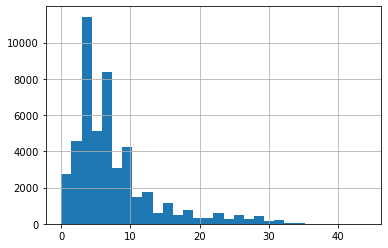

In [130]:
df['len']=[len(i) for i in df['tokens']]
import matplotlib.pyplot as plt

df['len'].hist(bins =30)

In [125]:
## 토큰화된 데이터 pickle로 저장
# import pandas as pd
# import pickle
# df = pd.DataFrame(np.array(token_test_data),columns=['tokens'])
# df['labels']=list(map(int,test_label))
# df2 = pd.DataFrame(token_test_data,test_label,columns=['tokens','lable'])
# df1.to_pickle('token_train_data.pkl')
# df2.to_pickle('token_test_data.pkl')

In [104]:
import pickle
import pandas as pd
df_train = pd.read_pickle('token_train_data.pkl')
df_test = pd.read_pickle('token_test_data.pkl')

token_train_data, train_lable = df_train['tokens'], df_train['labels']
token_test_data, test_lable = df_test['tokens'], df_test['labels']

In [4]:
df_test

,tokens,labels
0,[굳다],1
1,"[뭐, 이, 평점, 나쁘다, 점, 리, 더, 더욱, 아니다]",0
2,"[지루하다, 완전, 막장, 임, 돈, 보기]",0
3,"[만, 아니다, 별, 다섯, 개, 왜, 로, 제, 심기, 불편하다]",0
4,"[음악, 주가, 최고, 음악, 영화]",1
...,...,...
48990,"[만, 평점, 로, 킹왕짱, 쌈뽕, 영화, 강렬하다, 쾌함]",1
48991,"[의지, 박약, 탈영, 일단, 주인공, 김대희, 이등병]",0
48992,"[그림, 좋다, 완성, 도도, 높다, 내내, 불안하다]",0
48993,"[절대, 안, 영화, 재미, 없다, 기분, 잡, 세트, 해먹]",0


In [5]:
import functions as fc
max_len=30
final_train_data = fc.fasttext_vectorize(fc.pad_sequence(token_train_data), max_len=max_len)
final_test_data = fc.fasttext_vectorize(fc.   pad_sequence(token_test_data), max_len=max_len)


In [86]:
from tensorflow import keras
import tensorflow as tf
embedding_dim = 200
filter_sizes = (3, 4, 5)
num_filters = 100
dropout = 0.5
hidden_dims = 10

batch_size = 50
num_epochs = 10
min_word_count = 1
context = 10

conv_blocks = []

sequence_length = 200

# input_shape = (sequence_length, embedding_dim) # input shape for
input_shape = (40, 300) # input shape for data, (max_length of sent, vect)

model_input = keras.layers.Input(shape=input_shape)

z = model_input
for sz in filter_sizes:
    conv = keras.layers.Conv1D(filters=num_filters,
                         kernel_size=sz,
                         padding="valid",
                         activation="relu",
                         strides=1)(z)
    conv = keras.layers.MaxPooling1D(pool_size=2)(conv)
    conv = keras.layers.Flatten()(conv)
    conv_blocks.append(conv)
z = keras.layers.Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = keras.layers.Dense(hidden_dims, activation="relu", kernel_regularizer=keras.regularizers.l2(0.003), bias_regularizer=keras.regularizers.l2(0.003))(z)
z = keras.layers.Dropout(dropout)(z)
model_output = keras.layers.Dense(1, activation="sigmoid")(z)

model = keras.Model(model_input, model_output)



In [87]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [91]:
print(model.summary())

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 40, 300)]    0                                            
__________________________________________________________________________________________________
conv1d_30 (Conv1D)              (None, 38, 100)      90100       input_11[0][0]                   
__________________________________________________________________________________________________
conv1d_31 (Conv1D)              (None, 37, 100)      120100      input_11[0][0]                   
__________________________________________________________________________________________________
conv1d_32 (Conv1D)              (None, 36, 100)      150100      input_11[0][0]                   
______________________________________________________________________________________

In [88]:
import os
checkpoint_dir = './ckpt1'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=0),
    # This callback saves a SavedModel every 100 batches.
    # We include the training loss in the folder name.
    keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_dir + '/ckpt-loss={loss:.3f}',
        save_freq=500)
]
history = model.fit(final_train_data, train_lable, epochs=10, callbacks=callbacks, batch_size = batch_size, validation_data=(final_test_data, test_lable))

Epoch 1/10
2916/2916 [==============================] - 62s 21ms/step - loss: 0.5161 - accuracy: 0.7589 - val_loss: 0.4470 - val_accuracy: 0.8043
Epoch 2/10
2916/2916 [==============================] - 65s 22ms/step - loss: 0.4602 - accuracy: 0.8070 - val_loss: 0.4357 - val_accuracy: 0.8143
Epoch 3/10
2916/2916 [==============================] - 78s 27ms/step - loss: 0.4270 - accuracy: 0.8334 - val_loss: 0.4500 - val_accuracy: 0.8122


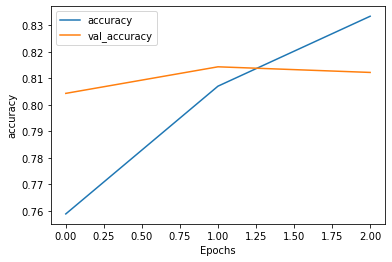

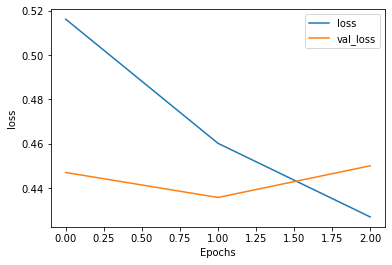

In [89]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [63]:
history.epoch = list(map(lambda x: x+25, history.epoch))
history.epoch

[25, 26, 27, 28, 29, 30, 31, 32, 33, 34]

In [64]:
data = {'val_accuracy':[],'accuracy':[],'epoch':[],'loss':[],'val_loss':[]}

In [65]:
for i in data.keys():
    if i == 'epoch':
        data['epoch'].extend(history.epoch)
    else:
        data[i].extend(history.history[i])

In [66]:
b = pd.DataFrame(data)
b

,val_accuracy,accuracy,epoch,loss,val_loss
0,0.749635,0.739264,25,0.823300,0.811371
1,0.750670,0.742426,26,0.812665,0.800976
2,0.751946,0.743708,27,0.802137,0.791035
3,0.752742,0.744079,28,0.793268,0.781680
4,0.753839,0.746548,29,0.783784,0.772517
5,0.754628,0.747563,30,0.774228,0.763764
6,0.755424,0.748928,31,0.766195,0.755443
7,0.756460,0.749381,32,0.757875,0.747414
8,0.757091,0.749429,33,0.750508,0.739713
9,0.757763,0.752481,34,0.742245,0.732248


In [67]:
new=pd.concat([new,b])
new

,val_accuracy,accuracy,epoch,loss,val_loss
0,0.532543,0.506314,0,1.274747,1.263718
1,0.563862,0.525698,1,1.254702,1.243995
2,0.590407,0.548738,2,1.234980,1.224682
3,0.611430,0.562374,3,1.216064,1.205606
4,0.629072,0.581010,4,1.197249,1.186625
5,0.643469,0.597499,5,1.178262,1.167502
6,0.657462,0.612109,6,1.159039,1.148056
7,0.669644,0.623708,7,1.139854,1.128148
8,0.680392,0.638551,8,1.119748,1.107688
9,0.689027,0.652084,9,1.099485,1.086620


In [71]:
new.set_index('epoch', inplace=True)

In [72]:
new

,val_accuracy,accuracy,loss,val_loss
epoch,,,,
0,0.532543,0.506314,1.274747,1.263718
1,0.563862,0.525698,1.254702,1.243995
2,0.590407,0.548738,1.234980,1.224682
3,0.611430,0.562374,1.216064,1.205606
4,0.629072,0.581010,1.197249,1.186625
5,0.643469,0.597499,1.178262,1.167502
6,0.657462,0.612109,1.159039,1.148056
7,0.669644,0.623708,1.139854,1.128148
8,0.680392,0.638551,1.119748,1.107688


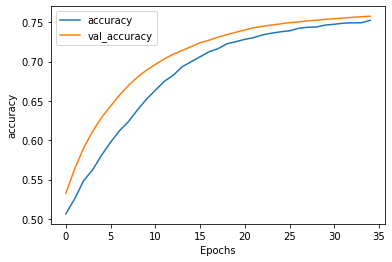

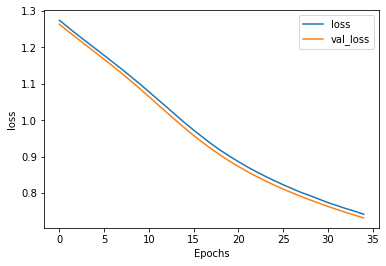

In [74]:
import matplotlib.pyplot as plt
def plot_graphs(data, string):
  plt.plot(data[string])
  plt.plot(data['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(new, 'accuracy')
plot_graphs(new, 'loss')